In [ ]:
#Projet ACADEMIQUE ML

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier # Model 
from sklearn.ensemble import RandomForestClassifier # Model 2
from sklearn.tree import DecisionTreeClassifier # Model 3
from sklearn.model_selection import RandomizedSearchCV # Model 4
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [162]:
df = pd.read_excel('default of credit card clients.xls',skiprows=1,index_col=0)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


nous pouvons voir que toutes les 24 colonnes ont un compte de 30000, ce qui indique qu'il n'y a pas de valeur manquante.

In [163]:
df.loc[:,'EDUCATION'].replace({0:4, 5:4, 6:4}, inplace=True)

Les valeurs 0,4,5,6 ont le même signification , donc on remplace les valeurs 0,5 et 6 par 4.

In [164]:
df=df.drop_duplicates()

In [174]:
df = df.rename(columns={'default payment next month':'DEFAULT'})

In [175]:
df = df.rename(columns={'PAY_0':'PAY_1'})

nous pouvons voir que le statut de remboursement est indiqué dans les colonnes PAY_0, PAY_2 ... sans aucune colonne PAY_1, nous renommerons donc PAY_0 en PAY_1 pour faciliter la compréhension.

In [176]:
#Les types des features

In [177]:
df.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT         int64
dtype: object

Ensuite, nous vérifions le type de données de chaque variable de l'ensemble de données. Nous voyons que toutes les colonnes sont de type int64 alors que d'après les connaissances antérieures, nous savons que SEXE, ÉDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month sont des caractéristiques catégorielles. Nous convertissons donc ces caractéristiques en catégories

In [172]:
"""df['SEX'] = df.SEX.astype('category')
df['EDUCATION'] = df.EDUCATION.astype('category')
df['MARRIAGE'] = df.MARRIAGE.astype('category')
df['PAY_1'] = df.PAY_1.astype('category')
df['PAY_2'] = df.PAY_2.astype('category')
df['PAY_3'] = df.PAY_3.astype('category')
df['PAY_4'] = df.PAY_4.astype('category')
df['PAY_5'] = df.PAY_5.astype('category')
df['PAY_6'] = df.PAY_6.astype('category')"""

In [63]:
#vérifier les valeurs manquantes pour la caution 
df.isnull().values.any()

False

pas de valeur manquante donc pas d'imputation.

In [65]:
#les dommes des valeurs non null
df.notnull().sum().sum()

719160

In [66]:
#nombre des lignes et colonnes de notres DataFrame
df.shape

(29965, 24)

In [178]:
#Informations général sur tous les features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
BILL_AMT1,29965.0,51283.009778,73658.132403,-165580.0,3595.0,22438.0,67260.0,964511.0
BILL_AMT2,29965.0,49236.366294,71195.567392,-69777.0,3010.0,21295.0,64109.0,983931.0
BILL_AMT3,29965.0,47067.916069,69371.352323,-157264.0,2711.0,20135.0,60201.0,1664089.0
BILL_AMT4,29965.0,43313.329885,64353.514373,-170000.0,2360.0,19081.0,54601.0,891586.0
BILL_AMT5,29965.0,40358.334390,60817.130623,-81334.0,1787.0,18130.0,50247.0,927171.0
BILL_AMT6,29965.0,38917.012281,59574.147742,-339603.0,1262.0,17124.0,49252.0,961664.0
PAY_AMT1,29965.0,5670.099316,16571.849467,0.0,1000.0,2102.0,5008.0,873552.0
PAY_AMT2,29965.0,5927.983180,23053.456645,0.0,850.0,2010.0,5000.0,1684259.0


Avant de passer à la visualisation, nous sélectionnons d'abord certaines caractéristiques qui, selon nous, seraient les plus corrélées à la variable cible. À partir des données fournies, nous voyons que nous voulons prédire si une personne fera défaut de paiement le mois prochain ou non. 
Cette prédiction dépend principalement de l'historique de remboursement précédent, quel est le solde limite, l'âge, l'éducation et le mariage. 

0    23335
1     6630
Name: DEFAULT, dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


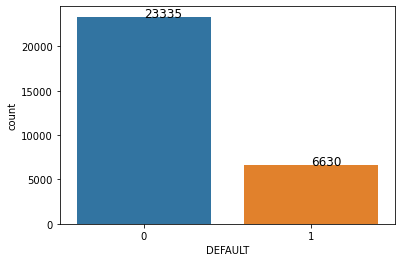

In [186]:
#Utiliser seaborn pour la représentation visuelle de nos variable(exemple var default payment next month)
import matplotlib.pyplot as plt 
import seaborn as sns #meme role que plotlib mais avec couleur (pour la distinction)
def_count = (df.DEFAULT.value_counts())
print(def_count)
sns.countplot(df['DEFAULT'],label="Count")
for x,y in zip([0,1],def_count):
    plt.text(x,y,y,fontsize=12)
plt.show()

Nous pouvons voir que l'ensemble de données se compose de 23335 des clients ne devraient pas faire défaut de paiement alors que 6630 des clients devraient faire défaut de paiement.

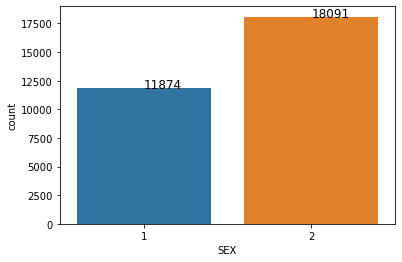

In [193]:
#Vsualisation de la variable sex
import matplotlib.pyplot as plt 
import seaborn as sns 
sex_count = (df.SEX.value_counts())
sns.countplot(df['SEX'],label="Count")
for x,y in zip([1,0],sex_count):
    plt.text(x,y,y,fontsize=12)
plt.show()

Nous pouvons voir que l'ensemble de données se compose de 11874 des hommes alors que 18091 des femmes.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


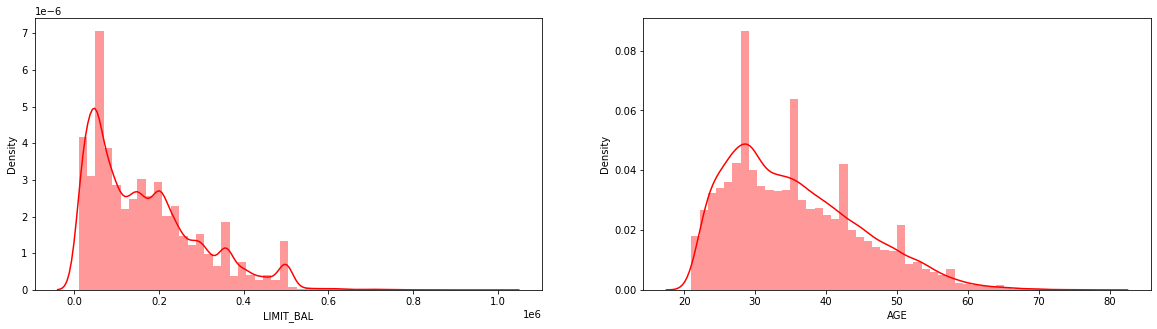

In [195]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL,color="r")

plt.subplot(122)
sns.distplot(df.AGE,color="r")

plt.show()

En traçant les variables continues, nous observons que l'ensemble de données se compose de données asymétriques sur l'équilibre limite et l'âge des clients.
Nous avons un plus grand nombre de clients ayant un solde limité entre 0 et 200 000 devises.
Nous avons plus de clients dans la tranche d'âge de 20 à 40 ans, c'est-à-dire des clients principalement des groupes jeunes à moyens.
Nous allons observer l'effet des variables sur la variable cible ci-dessous

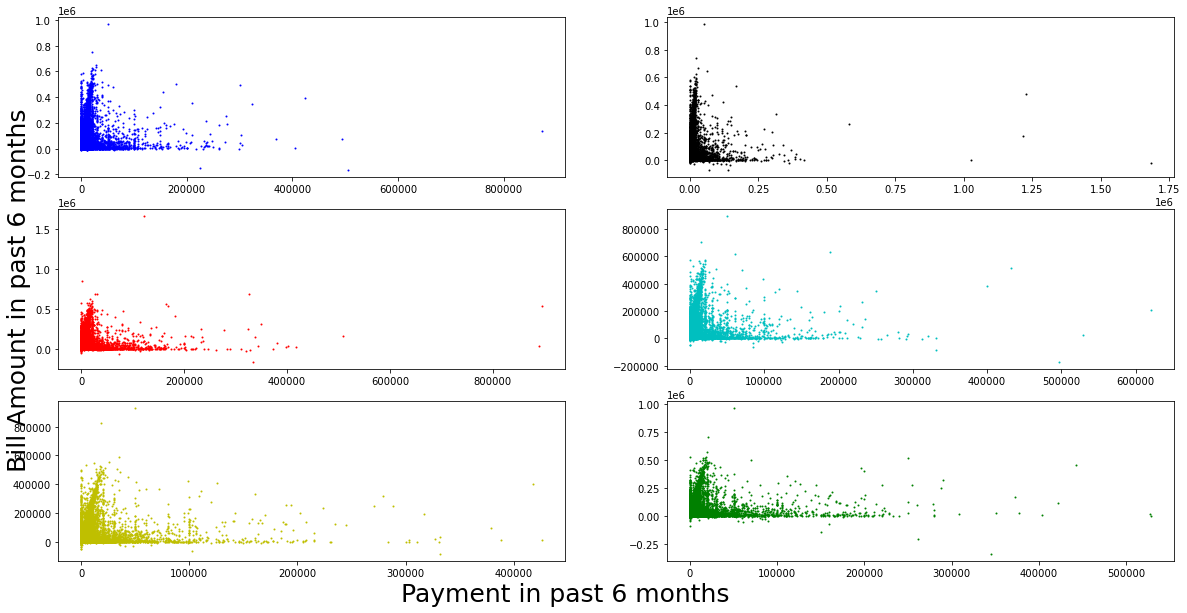

In [205]:
plt.subplots(figsize=(20,10))

plt.subplot(321)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='b', s=1)

plt.subplot(322)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='black', s=1)

plt.subplot(323)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='r', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)
plt.subplot(324)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)


plt.subplot(325)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25,x=1)

plt.subplot(326)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='g', s=1)

plt.show()

Le graphique ci-dessus indique qu'il y a une proportion plus élevée de clients pour lesquels le montant de la facture est élevé mais le paiement effectué contre celui-ci est très faible. Nous pouvons en déduire que le nombre maximum de points de données est étroitement emballé le long de l'axe Y près de 0 sur l'axe X

In [207]:
X = df.drop(['DEFAULT'], axis=1)
y = df['DEFAULT']

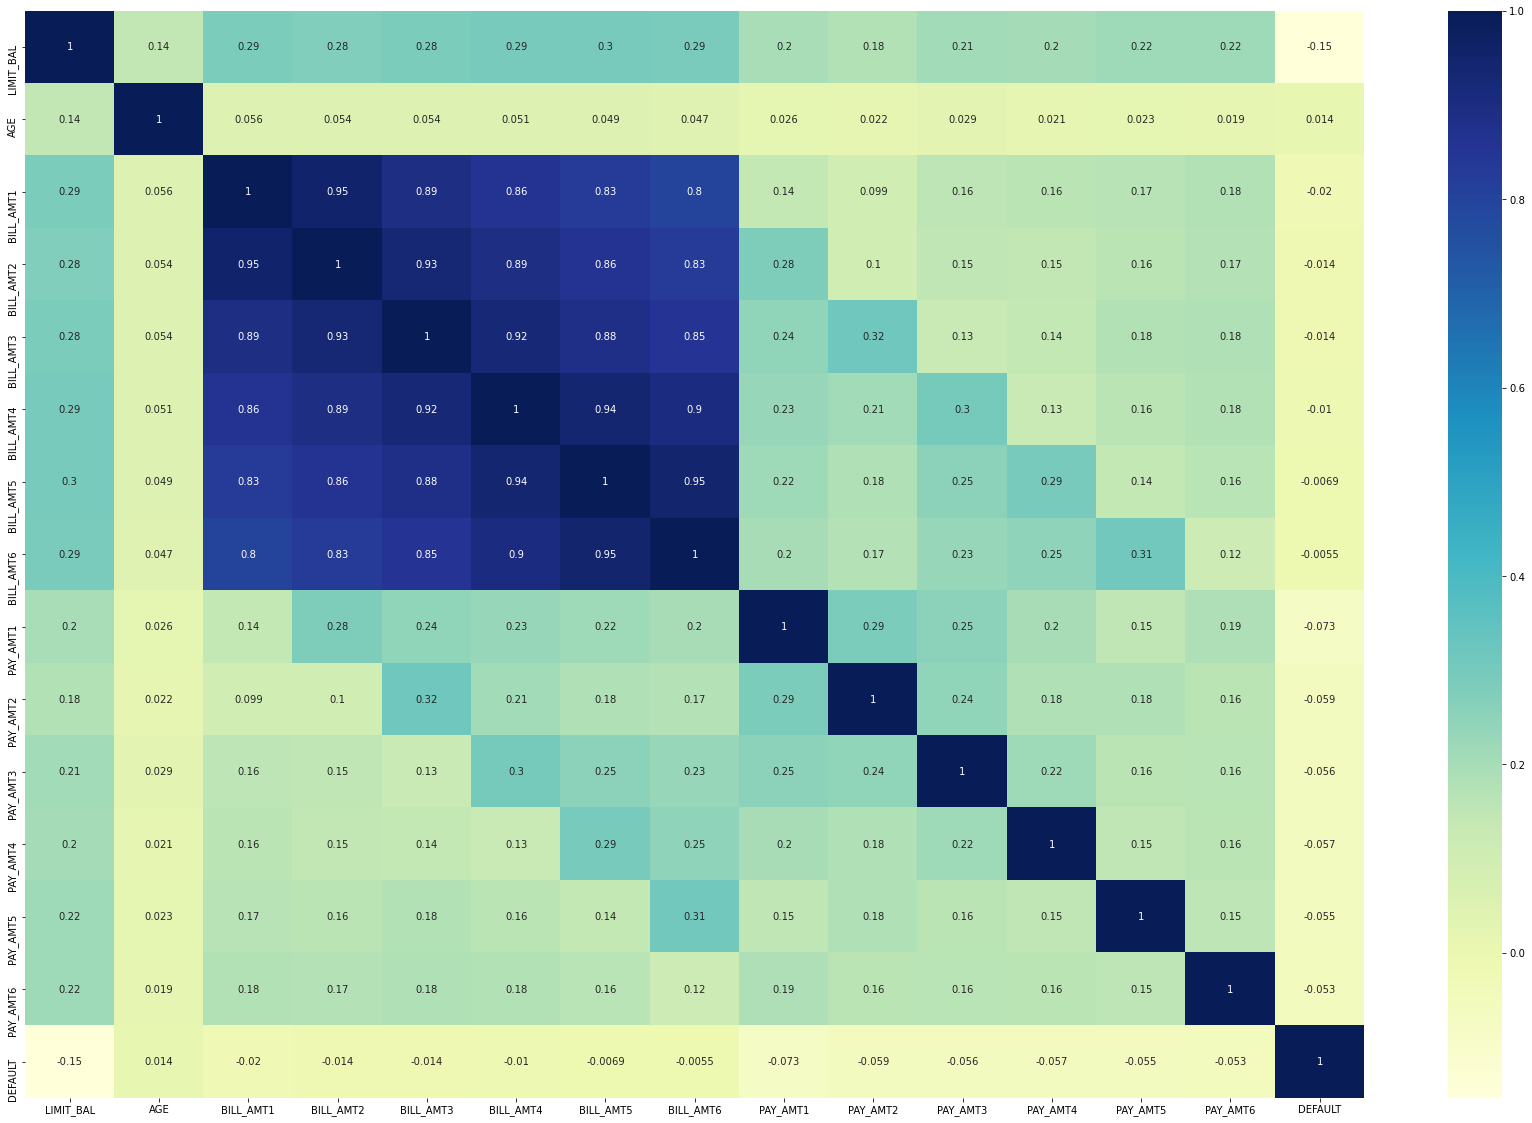

In [216]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
plt.show()

comme nous pouvons le voir, la prédiction par défaut du mois prochain dépend du statut de remboursement des six derniers mois de toutes les fonctionnalités qui nous sont données. Mais il existe une multicolinéarité entre les fonctionnalités du statut de remboursement.

Nous allons d'abord entraîner le modèle avec toutes les fonctionnalités et essayer de réduire les fonctionnalités non importantes.

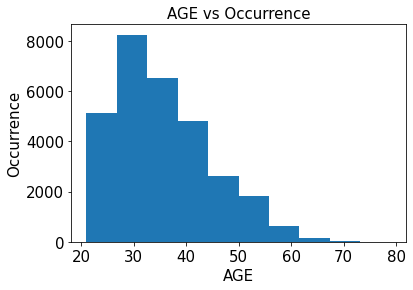

In [217]:
#histogramme age
plt.hist(df['AGE'])
plt.xlabel('AGE', fontsize=15)
plt.ylabel('Occurrence', fontsize=15)
plt.title('AGE vs Occurrence', fontsize=15)
plt.tick_params(labelsize=15)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


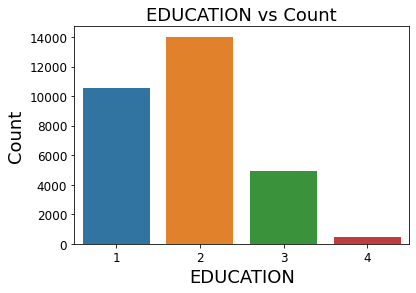

In [218]:
#countplot EDUCATION
sns.countplot(df['EDUCATION'],data=df)
plt.rcParams["figure.figsize"] = (35,12)
plt.xlabel('EDUCATION', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('EDUCATION vs Count', fontsize=18)
plt.tick_params(labelsize=12)

In [219]:
pay_=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
bill_amt=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

À partir des données fournies, la valeur -1 dans les colonnes PAY_1, PAY_2 ... indique que le client paye en totalité la montant de la facture. Donc logiquement, la valeur à payer correspondante au mois suivant doit être superieur ou égale au montant de la facture de ce mois.
donc si par exemple PAY_3 = -1 donc PAY_AMT2 doit être supérieure ou égal a BILL_AMT3

In [220]:
data=df
for i in range (1,6):
    data=data[(data[pay_[i]]!=-1)| ((data[pay_[i]]==-1)&(data[pay_amt[i-1]]>=data[bill_amt[i]]))]

In [223]:
data.shape

(29542, 24)

À partir des données fournies, la valeur -2 dans les colonnes PAY_1, PAY_2 ... indique que le client n'a rien consommé ce mois. Donc logiquement, le montant du prochain mois doit etre egal à le montant du ce mois moins la valeur payé le mois prochain .
donc si par exemple PAY_3 = -2 , BILL_3 = X1 et PAY_AMT2 = L2    ==> BILL_2 = X1-L2

In [231]:
data3=data
for i in range (1,6):
    data3=data3[(data3[pay_[i]]!=-2)| ((data3[pay_[i]]==-2)&(data3[bill_amt[i-1]]==(data3[bill_amt[i]]-data3[pay_amt[i-1]])))]

In [232]:
data3.shape

(26816, 24)

On met la cleared data dans une variable nommé df_cleaned

In [244]:
df_cleaned=data3

In [249]:
#Visualiser les valeurs aberrantes de quelques variables
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [250]:
# determinerles valeurs aberrantes à l'aide des quantiles et les supprimer

In [251]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IRQ = Q3 - Q1
     
    lower_bound = Q1 - 1.5 * IRQ
    upper_bound = Q3 + 1.5 * IRQ

    ls = df.index[  (df[ft] < lower_bound) | (df[ft] > upper_bound ) ]

    return ls

In [259]:
index_list= []
for feature in [ 'LIMIT_BAL','AGE']:
    index_list.extend(outliers(df_cleaned,feature))

In [260]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [261]:
df_cleaned2 = remove(df_cleaned, index_list)

In [262]:
df_cleaned2.shape

(26408, 24)

In [293]:
#On va travailler sur 26408 lignes 

In [294]:
#Normalisation

In [266]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df_cleaned):
    # copy the dataframe
    df_norm = df_cleaned.copy()
    # apply min-max scaling
    for column in ["LIMIT_BAL","AGE"]+bill_amt+pay_amt:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm
    
# call the min_max_scaling function
df_bank_normalized = min_max_scaling(df_cleaned2)

df_bank_normalized

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,0.020408,2,2,1,0.076923,2,2,-1,-1,-2,...,0.212846,0.121684,0.326684,0.000000,0.000567,0.000000,0.000000,0.000000,0.000000,1
2,0.224490,2,2,2,0.128205,-1,2,0,0,0,...,0.216943,0.126853,0.329821,0.000000,0.000823,0.001125,0.001610,0.000000,0.003783,1
3,0.163265,2,2,2,0.333333,0,0,0,0,0,...,0.230789,0.144048,0.341641,0.001738,0.001234,0.001125,0.001610,0.002345,0.009458,0
4,0.081633,2,2,1,0.410256,0,0,0,0,0,...,0.248296,0.165010,0.355107,0.002290,0.001661,0.001350,0.001771,0.002506,0.001892,0
5,0.081633,1,2,1,0.923077,-1,0,-1,0,0,...,0.239064,0.150329,0.345087,0.002290,0.030178,0.011248,0.014493,0.001615,0.001284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.428571,1,3,1,0.461538,0,0,0,0,0,...,0.323030,0.168418,0.342056,0.009730,0.016455,0.005627,0.004907,0.011723,0.001892,0
29997,0.285714,1,3,2,0.564103,-1,-1,-1,-1,0,...,0.224088,0.129449,0.326684,0.002103,0.002901,0.010121,0.000208,0.000000,0.000000,0
29998,0.040816,1,2,2,0.410256,4,3,2,-1,0,...,0.238986,0.152477,0.345304,0.000000,0.000000,0.024746,0.006763,0.004689,0.005864,1


In [267]:
#séparer Label Y
X = df_bank_normalized.drop("DEFAULT", axis=1) 
Y = df_bank_normalized["DEFAULT"]

In [268]:
Y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: DEFAULT, Length: 26408, dtype: int64

In [269]:
#FeatureSelection avec chi2

In [270]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [271]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=18) #k:nbr desfeatures les plus pertinents (on va laisser les 18 features les plus pertinents)
## chi2: Chi-squared stats of non-negative features for classification tasks.
fit = test.fit(X, Y)
fit.scores_

ValueError: Input X must be non-negative.

In [93]:
features = fit.transform(X)
print(features[1,:])

[1.11111111e-01 1.00000000e+00 3.33333333e-01 1.00000000e-01
 4.00000000e-01 2.00000000e-01 2.00000000e-01 2.00000000e-01
 4.00000000e-01 6.58619420e-02 1.63219937e-01 8.40739510e-02
 0.00000000e+00 5.93732912e-04 1.11602161e-03 1.61030596e-03
 0.00000000e+00 3.78310691e-03]


In [278]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=0.2)

In [279]:
def report_confusion(model,X_test,y_test):
    model_acc = model.score(X_test, y_test)*100

    print('Model Accuracy score is :', model_acc)

    print( classification_report(y_test, model.predict(X_test)) )

    plot_confusion_matrix(model, X_test, y_test, cmap="Blues_r")

    plt.show()
    return model_acc


#### KNeighborsClassifier

In [280]:
#choisir K le nombre des voisins qu'on va utiliser dans ce modéle

# Calculer le meilleur score pour k entre 1 et 50 et retourner les meilleurs parametres
param_grid = {'n_neighbors':np.arange(10,20),
              'metric':['euclidean','manhattan']}
grid1 = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid1.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [281]:
print("best score : ",grid1.best_score_)
print("best params : ",grid1.best_params_)
model_knn=grid1.best_estimator_

best score :  0.8081033668723064
best params :  {'metric': 'manhattan', 'n_neighbors': 18}


Model Accuracy score is : 81.23816736084817
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4071
           1       0.67      0.36      0.47      1211

    accuracy                           0.81      5282
   macro avg       0.75      0.65      0.68      5282
weighted avg       0.80      0.81      0.79      5282



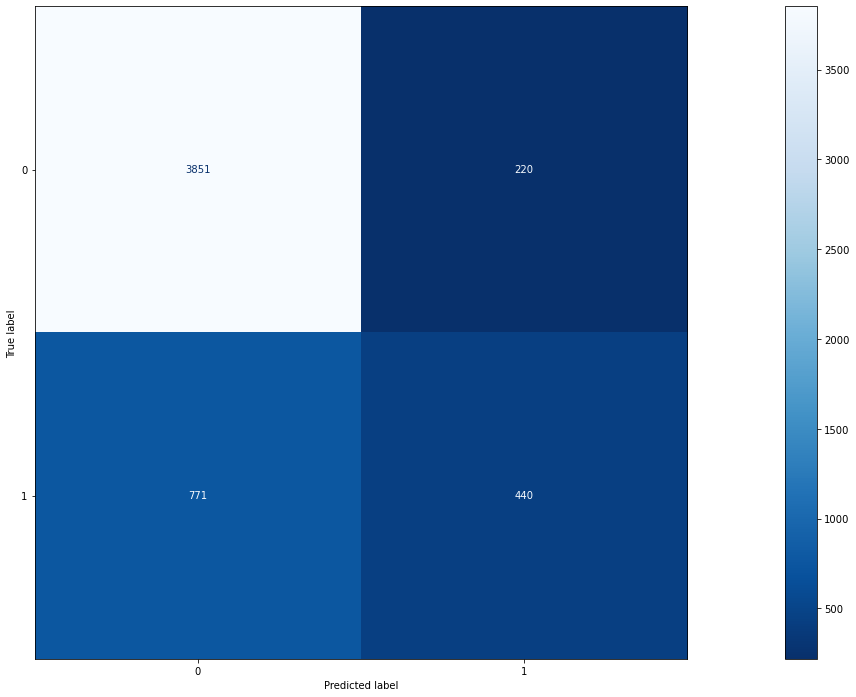

In [282]:
model_knn_acc=report_confusion(model_knn,X_test,y_test)

In [283]:

y_pred_knn =model_knn.predict(X_test)

In [284]:
#courbe ROC

In [285]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [286]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_knn) #
roc_auc2 = auc(fpr2, tpr2)

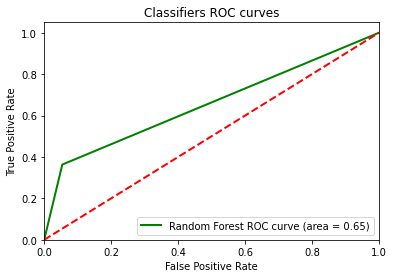

In [287]:
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

#### SVM

In [289]:
#Entrainer le modèle svm
svm = SVC() 
svm.fit(X_train, y_train) #.fit: pour faire le training sur les données d'apprentissage

SVC()

In [290]:
# Evaluer les performances du modèle

Model Accuracy score is : 81.5032184778493
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4071
           1       0.66      0.39      0.49      1211

    accuracy                           0.82      5282
   macro avg       0.75      0.67      0.69      5282
weighted avg       0.80      0.82      0.80      5282



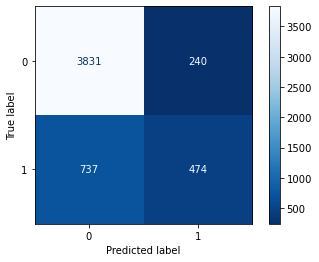

In [291]:
model_svm_acc=report_confusion(svm,X_test,y_test)
y_pred_svc_1=svm.predict(X_test)

In [292]:
# Kernel linéaire
model_svm_linear = SVC(kernel="linear")
model_svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

Model Accuracy score is : 79.98864066641424
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4071
           1       0.61      0.34      0.44      1211

    accuracy                           0.80      5282
   macro avg       0.72      0.64      0.66      5282
weighted avg       0.78      0.80      0.78      5282



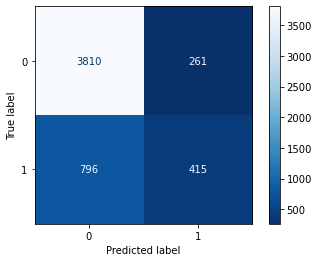

In [293]:
model_svm_acc2=report_confusion(model_svm_linear,X_test,y_test)
y_pred_svc_2=model_svm_linear.predict(X_test)

In [294]:
# Kernel poly
model_svm_poly = SVC(kernel="poly") 
model_svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

Model Accuracy score is : 81.67360848163574
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4071
           1       0.69      0.36      0.48      1211

    accuracy                           0.82      5282
   macro avg       0.76      0.66      0.68      5282
weighted avg       0.80      0.82      0.79      5282



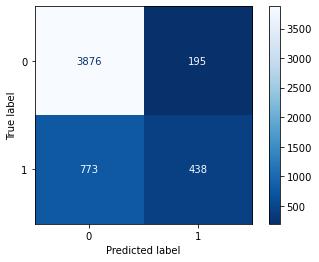

In [295]:
model_svm_acc3=report_confusion(model_svm_poly,X_test,y_test)
y_pred_svc_3=model_svm_poly.predict(X_test)

In [296]:
# Kernel sigmoid
model_svm_sigmoid = SVC(kernel="sigmoid") 
model_svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

Model Accuracy score is : 68.32639151836426
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      4071
           1       0.28      0.25      0.27      1211

    accuracy                           0.68      5282
   macro avg       0.53      0.53      0.53      5282
weighted avg       0.67      0.68      0.68      5282



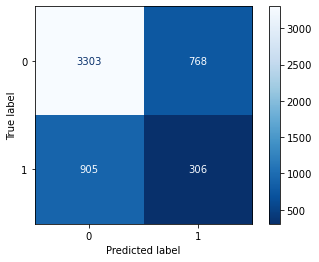

In [297]:
model_svm_acc4=report_confusion(model_svm_sigmoid,X_test,y_test)
y_pred_svc_4=model_svm_sigmoid.predict(X_test)

In [114]:
#comparaison des scores des SVC(rbf,sigmoid,lineaire..)

In [298]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False) #trie de resultat

,Model,Score
2,Support Vector Machines polynomiale,0.816736
0,Support Vector Machines RBF,0.815032
1,Support Vector Machines Linaire,0.799886
3,Support Vector Machines sigmoïde,0.683264


In [116]:
#courbe ROC SVM

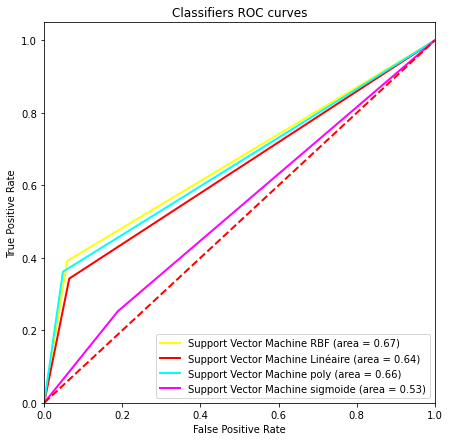

In [299]:
#les coures roc pour davoir quelle algo on va uliser
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Support Vector Machine Linéaire (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Support Vector Machine poly (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support Vector Machine sigmoide (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()
#linestyle -- est une droite decoupé bech eli ta7tha menakhtarhech nakhtar eli fou9ha 

In [300]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,20)}

In [304]:
grid2 = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid=param_grid, cv=5)
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [305]:
print("best score : ",grid2.best_score_)
print("best params : ",grid2.best_params_)
model_tree=grid2.best_estimator_

best score :  0.8137832913746126
best params :  {'criterion': 'gini', 'max_depth': 3}


Model Accuracy score is : 81.37069291934873
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4071
           1       0.66      0.39      0.49      1211

    accuracy                           0.81      5282
   macro avg       0.75      0.67      0.69      5282
weighted avg       0.80      0.81      0.80      5282



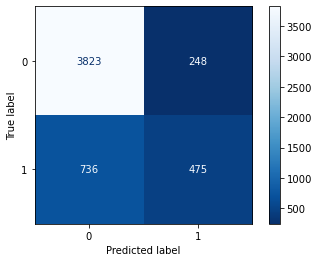

In [306]:
model_tree_acc=report_confusion(model_tree,X_test,y_test)
y_pred_tree=model_tree.predict(X_test)

In [307]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Accuracy score is : 80.44301400984476
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4071
           1       0.69      0.27      0.39      1211

    accuracy                           0.80      5282
   macro avg       0.75      0.62      0.63      5282
weighted avg       0.79      0.80      0.77      5282



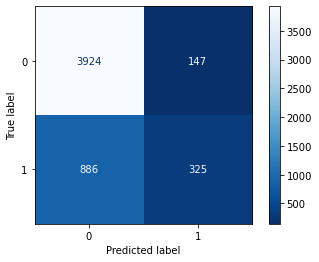

In [308]:
model_log_acc=report_confusion(model_log,X_test,y_test)
y_pred_log=model_tree.predict(X_test)

In [309]:
model_forest = RandomForestClassifier(max_depth=10)

model_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

Model Accuracy score is : 81.42748958727755
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4071
           1       0.66      0.38      0.49      1211

    accuracy                           0.81      5282
   macro avg       0.75      0.66      0.69      5282
weighted avg       0.80      0.81      0.80      5282



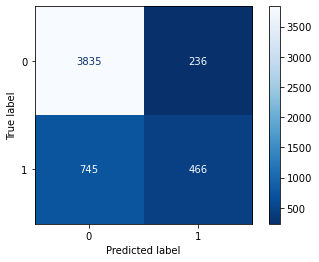

In [310]:
model_forest_acc=report_confusion(model_forest,X_test,y_test)
y_pred_forest=model_forest.predict(X_test)

In [311]:
model_ada = AdaBoostClassifier(n_estimators=150,random_state=100)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=100)

Model Accuracy score is : 81.35176069670578
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4071
           1       0.68      0.35      0.46      1211

    accuracy                           0.81      5282
   macro avg       0.76      0.65      0.68      5282
weighted avg       0.80      0.81      0.79      5282



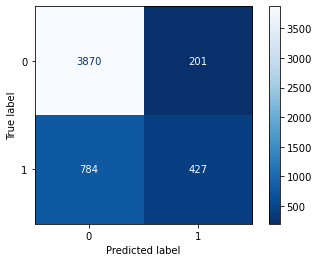

In [312]:
model_ada_acc=report_confusion(model_ada,X_test,y_test)
y_pred_ada=model_ada.predict(X_test)

In [313]:
from sklearn.ensemble import GradientBoostingClassifier
# fit model no training data
model_gradient = GradientBoostingClassifier(learning_rate=0.1)
model_gradient.fit(X_train, y_train)

GradientBoostingClassifier()

Model Accuracy score is : 81.65467625899281
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4071
           1       0.67      0.39      0.50      1211

    accuracy                           0.82      5282
   macro avg       0.75      0.67      0.69      5282
weighted avg       0.80      0.82      0.80      5282



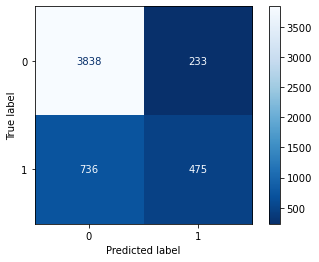

In [314]:
model_gradient_acc=report_confusion(model_gradient,X_test,y_test)
y_pred_gradient=model_gradient.predict(X_test)

In [320]:
model_XGBC = XGBClassifier()
model_XGBC.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
                categorical type is supplied, DMatrix parameter `enable_categorical` must
                be set to `True`.SEX, EDUCATION, MARRIAGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

In [321]:
model_XGBC_acc=report_confusion(model_XGBC,X_test,y_test)
y_pred_XGBC=model_XGBC.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

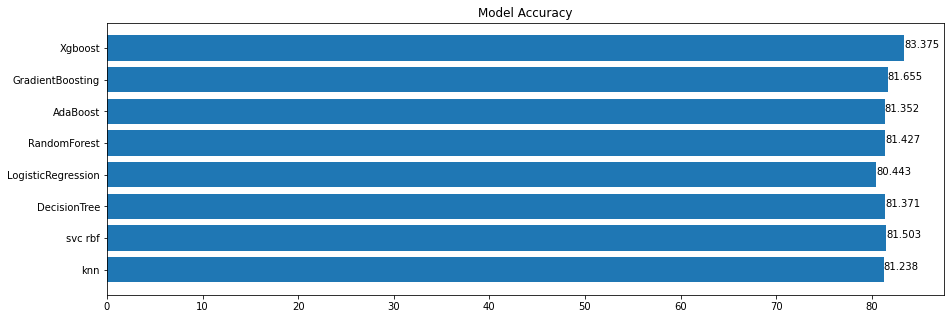

In [322]:
models = ['knn', 'svc rbf','DecisionTree','LogisticRegression','RandomForest','AdaBoost','GradientBoosting','Xgboost']

acc = [model_knn_acc, model_svm_acc, model_tree_acc, model_log_acc,model_forest_acc,model_ada_acc,model_gradient_acc,model_XGBC_acc]

plt.figure(figsize=(15,5))
plt.barh(models, acc)
  
for index, value in enumerate(acc):
    plt.text(value, index,
             str("%.3f"%value))
plt.title("Model Accuracy")
plt.show()